SetUP

### train data 준비

In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 압축풀기
!unzip '/content/drive/MyDrive/project.zip'

Archive:  /content/drive/MyDrive/project.zip
   creating: project/normal/
  inflating: project/normal/100 (2).jpg  
  inflating: project/normal/100.jpg  
  inflating: project/normal/101 (2).jpg  
  inflating: project/normal/101.jpg  
  inflating: project/normal/102.jpg  
  inflating: project/normal/103 (2).jpg  
  inflating: project/normal/103.jpg  
  inflating: project/normal/105.jpg  
  inflating: project/normal/106.jpg  
  inflating: project/normal/107 (2).jpg  
  inflating: project/normal/107.jpg  
  inflating: project/normal/109 (2).jpg  
  inflating: project/normal/109.jpg  
  inflating: project/normal/111 (2).jpg  
  inflating: project/normal/111.jpg  
  inflating: project/normal/112 (2).jpg  
  inflating: project/normal/112.jpg  
  inflating: project/normal/113 (2).jpg  
  inflating: project/normal/113.jpg  
  inflating: project/normal/114.jpg  
  inflating: project/normal/115.jpg  
  inflating: project/normal/116 (2).jpg  
  inflating: project/normal/116.jpg  
  inflating: pro

In [3]:
# normal 폴더에 디코딩 가능 여부 확인 및 파일 저장
import tensorflow as tf
import glob
import os

# Get a list of image paths
image_paths = glob.glob(os.path.join('/content/project/normal', '*.jpg'))

# Create the 'norm' directory
norm_directory = '/content/project/norm'
os.makedirs(norm_directory, exist_ok=True)

for i, image_path in enumerate(image_paths):
    print(i, image_path)

    try:
        image_contents = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image_contents, channels=3)

        # Construct the new path in the 'norm' directory
        new_image_path = os.path.join(norm_directory, os.path.basename(image_path))

        # Save the image in the 'norm' directory
        with tf.io.gfile.GFile(new_image_path, 'wb') as f:
            f.write(image_contents.numpy())

        print("Moved and processed:", image_path)
    except tf.errors.InvalidArgumentError:
        print("Error decoding image:", image_path, "- Skipping this image")


0 /content/project/normal/5_00000574.jpg
Moved and processed: /content/project/normal/5_00000574.jpg
1 /content/project/normal/norm_722.jpg
Moved and processed: /content/project/normal/norm_722.jpg
2 /content/project/normal/norm_552.jpg
Moved and processed: /content/project/normal/norm_552.jpg
3 /content/project/normal/norm_769.jpg
Moved and processed: /content/project/normal/norm_769.jpg
4 /content/project/normal/norm_950.jpg
Moved and processed: /content/project/normal/norm_950.jpg
5 /content/project/normal/norm_794.jpg
Moved and processed: /content/project/normal/norm_794.jpg
6 /content/project/normal/norm_141.jpg
Moved and processed: /content/project/normal/norm_141.jpg
7 /content/project/normal/norm_540.jpg
Moved and processed: /content/project/normal/norm_540.jpg
8 /content/project/normal/5_00000028.jpg
Moved and processed: /content/project/normal/5_00000028.jpg
9 /content/project/normal/norm_797.jpg
Moved and processed: /content/project/normal/norm_797.jpg
10 /content/project/no

In [4]:
# unnormal 폴더에 디코딩 가능 여부 확인 및 파일 저장
import tensorflow as tf
import glob
import os

# Get a list of image paths
image_paths = glob.glob(os.path.join('/content/project/unnormal', '*.jpg'))

# Create the 'norm' directory
norm_directory = '/content/project/unnorm'
os.makedirs(norm_directory, exist_ok=True)

for i, image_path in enumerate(image_paths):
    print(i, image_path)

    try:
        image_contents = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image_contents, channels=3)

        # Construct the new path in the 'norm' directory
        new_image_path = os.path.join(norm_directory, os.path.basename(image_path))

        # Save the image in the 'norm' directory
        with tf.io.gfile.GFile(new_image_path, 'wb') as f:
            f.write(image_contents.numpy())

        print("Moved and processed:", image_path)
    except tf.errors.InvalidArgumentError:
        print("Error decoding image:", image_path, "- Skipping this image")


0 /content/project/unnormal/unnorm_1135.jpg
Error decoding image: /content/project/unnormal/unnorm_1135.jpg - Skipping this image
1 /content/project/unnormal/unnorm_171.jpg
Moved and processed: /content/project/unnormal/unnorm_171.jpg
2 /content/project/unnormal/unnorm_531.jpg
Moved and processed: /content/project/unnormal/unnorm_531.jpg
3 /content/project/unnormal/unnorm_1057.jpg
Moved and processed: /content/project/unnormal/unnorm_1057.jpg
4 /content/project/unnormal/8_00000422.jpg
Moved and processed: /content/project/unnormal/8_00000422.jpg
5 /content/project/unnormal/unnorm_542.jpg
Moved and processed: /content/project/unnormal/unnorm_542.jpg
6 /content/project/unnormal/5_00000211.jpg
Moved and processed: /content/project/unnormal/5_00000211.jpg
7 /content/project/unnormal/5_00000134.jpg
Moved and processed: /content/project/unnormal/5_00000134.jpg
8 /content/project/unnormal/unnorm_1469.jpg
Moved and processed: /content/project/unnormal/unnorm_1469.jpg
9 /content/project/unnorma

In [5]:
# 파일 하나로 통합
import os
import shutil

# Define paths
project_path = '/content/project'
norm_path = os.path.join(project_path, 'norm')
unnorm_path = os.path.join(project_path, 'unnorm')
destination_path = os.path.join(project_path, 'after')

# Create the 'after' directory
os.makedirs(destination_path, exist_ok=True)

# Move 'norm' and 'unnorm' subdirectories into 'after'
shutil.move(norm_path, os.path.join(destination_path, 'norm'))
shutil.move(unnorm_path, os.path.join(destination_path, 'unnorm'))

print("Organized directory structure.")

Organized directory structure.


In [6]:
# 기존 폴더(normal, unnormal) 삭제
import shutil

directory_path = '/content/project/normal'
shutil.rmtree(directory_path)
directory_path = '/content/project/unnormal'
shutil.rmtree(directory_path)

- 이미지 파일을 원형만 사용하도록 전처리 작업 수행

In [7]:
import cv2
import numpy as np
import os
import shutil

# 디렉토리 경로 정의 (원본 이미지)
original_directory = '/content/project/after/norm/'

# 디렉토리 경로 정의 (크롭된 이미지)
cropped_directory = '/content/project/after/crp_norm/'

# 크롭된 이미지를 저장할 새로운 폴더 생성
os.makedirs(cropped_directory, exist_ok=True)

# 원본 디렉토리 내 모든 .jpg 파일 목록 가져오기
jpg_files = [file for file in os.listdir(original_directory) if file.lower().endswith('.jpg')]

# 각 .jpg 파일에 대해 반복 실행
for jpg_file in jpg_files:
    # 원본 이미지의 전체 경로 생성
    original_image_path = os.path.join(original_directory, jpg_file)

    # 원본 이미지 읽기
    original_image = cv2.imread(original_image_path)

    # 원의 중심점 정의 (x, y)
    center_point = (original_image.shape[1] // 2, original_image.shape[0] // 2)

    # 원의 반지름 정의 (원의 크기를 조정하려면 이 값을 변경)
    circle_radius = 600  # 원하는 반지름 값으로 변경

    # 원 모양의 마스크 생성
    mask = np.zeros_like(original_image)
    cv2.circle(mask, center_point, circle_radius, (255, 255, 255), -1)

    # 마스크를 원본 이미지에 적용
    cropped_image = cv2.bitwise_and(original_image, mask)

    # 크롭된 이미지를 저장할 출력 경로 생성
    cropped_image_path = os.path.join(cropped_directory, f"cropped_{jpg_file}")

    # 크롭된 이미지 저장
    cv2.imwrite(cropped_image_path, cropped_image)

    # # 원본 이미지를 크롭된 디렉토리로 복사
    # shutil.copy(original_image_path, cropped_directory)

    # 원본 이미지를 원본 디렉토리에서 삭제
    os.remove(original_image_path)

print(f"크롭된 이미지 저장 완료: {cropped_image_path}")
print(f"원본 이미지 삭제: {original_image_path}")


크롭된 이미지 저장 완료: /content/project/after/crp_norm/cropped_norm_811.jpg
원본 이미지 삭제: /content/project/after/norm/norm_811.jpg


In [8]:
import cv2
import numpy as np
import os
import shutil

# 디렉토리 경로 정의 (원본 이미지)
original_directory = '/content/project/after/unnorm/'

# 디렉토리 경로 정의 (크롭된 이미지)
cropped_directory = '/content/project/after/crp_unnorm/'

# 크롭된 이미지를 저장할 새로운 폴더 생성
os.makedirs(cropped_directory, exist_ok=True)

# 원본 디렉토리 내 모든 .jpg 파일 목록 가져오기
jpg_files = [file for file in os.listdir(original_directory) if file.lower().endswith('.jpg')]

# 각 .jpg 파일에 대해 반복 실행
for jpg_file in jpg_files:
    # 원본 이미지의 전체 경로 생성
    original_image_path = os.path.join(original_directory, jpg_file)

    # 원본 이미지 읽기
    original_image = cv2.imread(original_image_path)

    # 원의 중심점 정의 (x, y)
    center_point = (original_image.shape[1] // 2, original_image.shape[0] // 2)

    # 원의 반지름 정의 (원의 크기를 조정하려면 이 값을 변경)
    circle_radius = 600  # 원하는 반지름 값으로 변경

    # 원 모양의 마스크 생성
    mask = np.zeros_like(original_image)
    cv2.circle(mask, center_point, circle_radius, (255, 255, 255), -1)

    # 마스크를 원본 이미지에 적용
    cropped_image = cv2.bitwise_and(original_image, mask)

    # 크롭된 이미지를 저장할 출력 경로 생성
    cropped_image_path = os.path.join(cropped_directory, f"cropped_{jpg_file}")

    # 크롭된 이미지 저장
    cv2.imwrite(cropped_image_path, cropped_image)

    # # 원본 이미지를 크롭된 디렉토리로 복사
    # shutil.copy(original_image_path, cropped_directory)

    # 원본 이미지를 원본 디렉토리에서 삭제
    os.remove(original_image_path)

print(f"크롭된 이미지 저장 완료: {cropped_image_path}")
print(f"원본 이미지 삭제: {original_image_path}")


크롭된 이미지 저장 완료: /content/project/after/crp_unnorm/cropped_unnorm_642.jpg
원본 이미지 삭제: /content/project/after/unnorm/unnorm_642.jpg


In [9]:
# 기존 폴더(norm, unnorm) 삭제
import shutil

directory_path = '/content/project/after/norm'
shutil.rmtree(directory_path)
directory_path = '/content/project/after/unnorm'
shutil.rmtree(directory_path)

- 해당 작업을 수행하면, 마스킹되지 않은 파일은 잘 구분못할거임 -> 따라서 새로운 파일이 들어오면 마스킹 작업을 처리한 후, 시작해야함  
- 마스킹된 이미지랑, 안된 이미지를 같이 넣고 학습을 해보자 -> 모델이 너무 커서 못돌아감
- validation 된거는 기존 이미지가 들어가야함 -> 해당 작업은 training데이터에만 수행하면 됨

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [20]:
IMAGE_SIZE = (224, 224)
batch_size = 32           # 모델트레이닝할때 몇개씩 집어넣을까를 결정하는 batch_size

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/project/after",
    validation_split=0.4,
    subset="training",  # Use "training" for training subset
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/project/after",
    validation_split=0.4,
    subset="validation",  # Use "validation" for validation subset
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)


Found 4098 files belonging to 2 classes.
Using 2459 files for training.
Found 4098 files belonging to 2 classes.
Using 1639 files for validation.


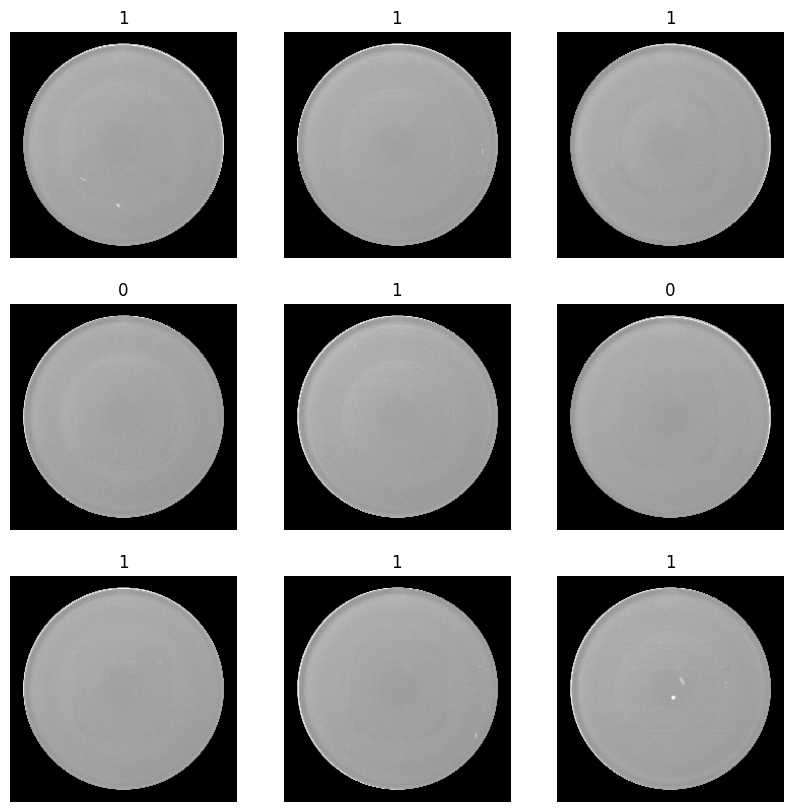

In [12]:
# 라벨링된 데이터 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### 데이터 증강

In [13]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# data_augmentation = keras.Sequential(
#     [
#         # layers.RandomFlip("horizontal"),
#         # layers.RandomRotation(0.1),
#     ]
# )


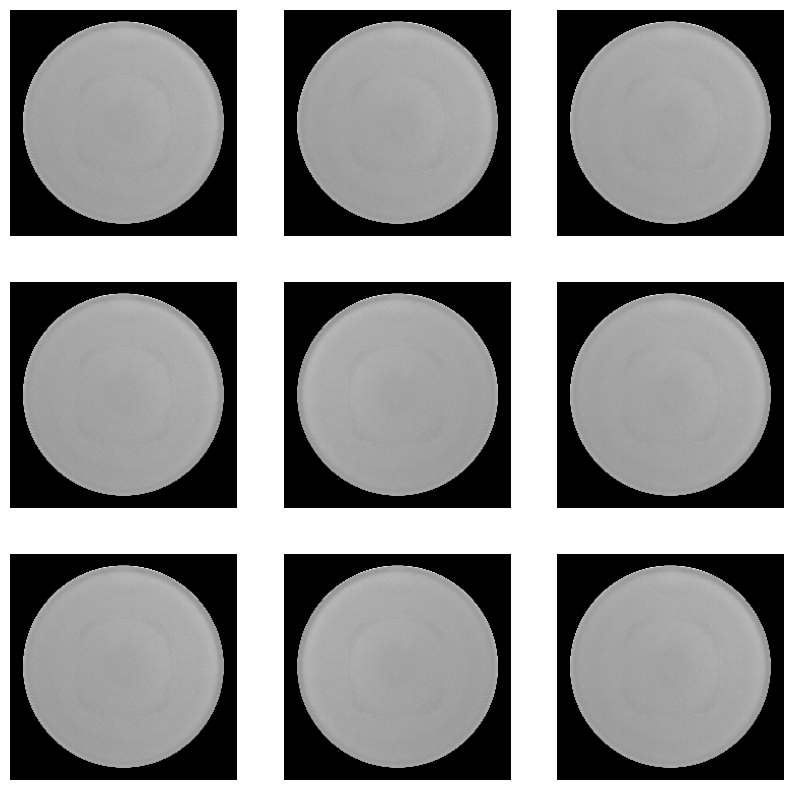

In [14]:
# 증강된 데이터 시각화로 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [15]:
# # 데이터의 크기가 0~1사이로 들어오도록 만들기, 2번째 방식을 채택
# augmented_train_ds = train_ds.map(
#     lambda x, y: (data_augmentation(x, training=True), y))


In [16]:
# # 증강된 데이터 트레이닝 데이터에 넣기
# train_ds = train_ds.map(
#     lambda img, label: (data_augmentation(img), label),
#     num_parallel_calls=tf.data.AUTOTUNE,
# )

# # train_ds 셔플시키기
# train_ds = train_ds.shuffle(buffer_size=1000)

# # 미리 준비시켜놓기
# train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
# val_ds = val_ds.prefetch(tf.data.AUTOTUNE)


In [21]:
# 데이터 증강을 안하는 경우
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

# train_ds 셔플시키기
train_ds = train_ds.shuffle(buffer_size=1000)

# 미리 준비시켜놓기
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
# # 가중치 조정
# class_weights = {
#     0: 5.0,  # Class 0 (e.g., majority class)
#     1: 5.0   # Class 1 (e.g., minority class)
# }


### 모델 불러오기

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

img_width, img_height = 224, 224
batch_size = 8            #훈련할때 몇개씩 훈련할지를 결정하는 batch_size

# MobileNetV2 모델의 상위 레이어 제외하고 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# 사용자 정의 레이어와 L2 규제 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 규제 적용 (규제 강도: 0.01
x = Dropout(0.5)(x)  # 드롭아웃 레이어 추가 (드롭아웃 비율: 50%)
predictions = Dense(1, activation='sigmoid')(x)

# 사용자 정의 레이어와 모델 결합
model = Model(inputs=base_model.input, outputs=predictions)

# 가중치 업데이트를 위해 레이어를 설정
for layer in base_model.layers:
    layer.trainable = True


### 모델학습

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
# 모델 학습하기
epochs = 30
# 모델 저장
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/team_project.h5' # team_project라는 이름으로 저장
checkpoint_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                save_weights_only=False,
                                                verbose=1)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=checkpoint_callback,
    validation_data=val_ds,
    # class_weight=class_weights  # Add class weights here
)

Epoch 1/30
77/77 [==============================] - ETA: 0s - loss: 2.7997 - accuracy: 0.6836
Epoch 1: val_accuracy improved from -inf to 0.59182, saving model to /content/drive/MyDrive/Colab Notebooks/team_project.h5
77/77 [==============================] - 78s 321ms/step - loss: 2.7997 - accuracy: 0.6836 - val_loss: 2.7624 - val_accuracy: 0.5918
Epoch 2/30
77/77 [==============================] - ETA: 0s - loss: 2.4386 - accuracy: 0.7605
Epoch 2: val_accuracy did not improve from 0.59182
77/77 [==============================] - 43s 307ms/step - loss: 2.4386 - accuracy: 0.7605 - val_loss: 2.6274 - val_accuracy: 0.4076
Epoch 3/30
77/77 [==============================] - ETA: 0s - loss: 2.2049 - accuracy: 0.7727
Epoch 3: val_accuracy did not improve from 0.59182
77/77 [==============================] - 45s 295ms/step - loss: 2.2049 - accuracy: 0.7727 - val_loss: 2.6493 - val_accuracy: 0.4015
Epoch 4/30
77/77 [==============================] - ETA: 0s - loss: 2.0053 - accuracy: 0.7898
Ep

52/52 [==============================] - 14s 227ms/step


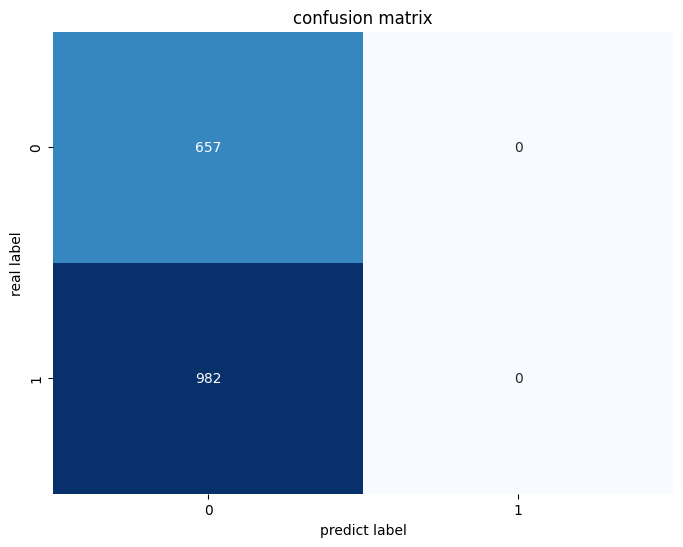

In [24]:
# 모델 import
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 모델 불러오기
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/team_project.h5'
loaded_model = keras.models.load_model(checkpoint_path)

# 검증 데이터에 대한 예측 확률 획득
val_probabilities = loaded_model.predict(val_ds)

# 확률을 이진 예측으로 변환 (0 또는 1)
val_predictions = np.argmax(val_probabilities, axis=1)

# 검증 데이터의 실제 레이블 얻기
val_true_labels = np.concatenate([y for x, y in val_ds], axis=0)

# 혼동 행렬 계산
confusion = confusion_matrix(val_true_labels, val_predictions)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("predict label")
plt.ylabel("real label")
plt.title("confusion matrix")
plt.show()

- val_accuracy가 고정 : lr 변경 : 1e-04로 바꿈
- 드롭아웃, L2정규화, : 드롭아웃 , 정규화 추가
- 시도 : batch 사이즈 변경 (8로)
- 시도 : 이미지 재분류
- 시도할것 : 이미지 사이즈에서 외부 스크래치는 영향 없도록 원형으로 자르기 or 일정 크기 맞추기

https://keras.io/examples/vision/image_classification_from_scratch/ 참고

- 실제 모델을 적용하려면 원형으로 자르는 과정을 거쳐야 할 것

- 혼동행렬이 편향됨, val_accuracy가 변화가 없다 = 데이터세트가 0과 1로 구분될만큼 특징점이 잡히지 않았다는 의미 => 이미지를 원형으로 자르고 시도해보기로 결정
- val_accuracy변화를 위해 데이터증강을 수행X  
- 이유 : 데이터 증강중 rotation은 오히려 val에 혼란만 줄뿐이다. 기존 val_data는 마스킹된 영역에 다른 이미지가 존재하지 않았으므로
- 데이터 증강 자체를 수행하지 않고 진행해보자 => val_accu 증가